In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
# Задание 2. Рассчитаем основные статистики для переменных dataframe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Задание 2. Рассчитаем моду для для количественных переменных dataframe
print(f'Значение моды для satisfaction_level: {df.satisfaction_level.round(1).mode()[0]}')
print(f'Значение моды для last_evaluation: {df.last_evaluation.round(1).mode()[0]}')
print(f'Значение моды для number_project: {df.number_project.mode()[0]}')
print(f'Значение моды для average_montly_hours: {df.average_montly_hours.mode()[0]}')
print(f'Значение моды для time_spend_company: {df.time_spend_company.mode()[0]}')

Значение моды для satisfaction_level: 0.8
Значение моды для last_evaluation: 0.6
Значение моды для number_project: 4
Значение моды для average_montly_hours: 135
Значение моды для time_spend_company: 3


In [6]:
# Задание 2 Рассчитаем медиану для количественных переменных dataframe
print(f'Значение медианы для satisfaction_level: {df.satisfaction_level.median()}')
print(f'Значение медианы для last_evaluation: {df.last_evaluation.median()}')
print(f'Значение медианы для number_project: {df.number_project.median()}')
print(f'Значение медианы для average_montly_hours: {df.average_montly_hours.median()}')
print(f'Значение медианы для time_spend_company: {df.time_spend_company.median()}')

Значение медианы для satisfaction_level: 0.64
Значение медианы для last_evaluation: 0.72
Значение медианы для number_project: 4.0
Значение медианы для average_montly_hours: 200.0
Значение медианы для time_spend_company: 3.0


In [8]:
# Задание 3. Рассчитаем корреляционную матрицу для количественных переменных
"""
Две самые скоррелированные переменные: number_project, average_montly_hours 
Две наименее скоррелированные переменные: number_project, satisfaction_level
"""
df_sample = df.iloc[:, [0, 1, 2, 3, 4]].head()
df_sample.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.294175,-0.051458,0.126329,0.742886
last_evaluation,0.294175,1.000000,0.937752,0.943847,0.819158
number_project,-0.051458,0.937752,1.000000,0.955841,0.601417
average_montly_hours,0.126329,0.943847,0.955841,1.000000,0.756883
time_spend_company,0.742886,0.819158,0.601417,0.756883,1.000000


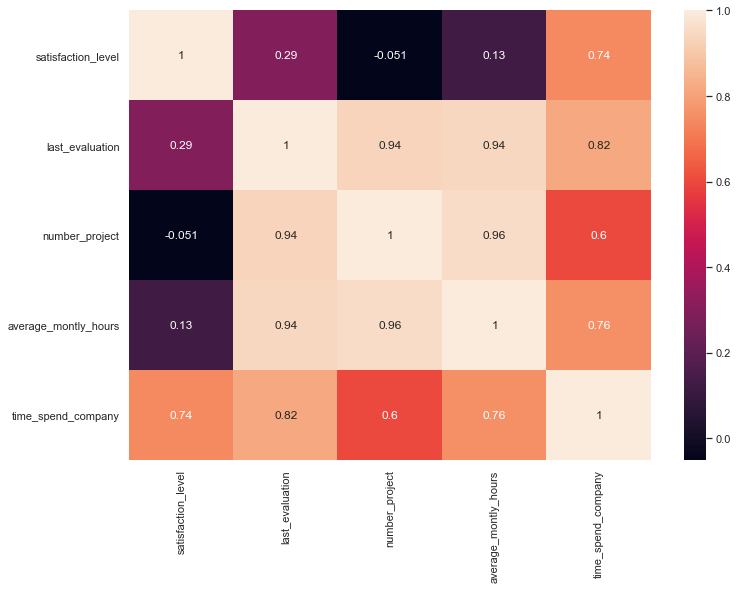

In [10]:
# Задание 3. Визуализируем корреляционную матрицу
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr(), annot=True)

In [11]:
# Задание 4. Расчитаем сколько сотрудников работает в каждом департаменте
df_grouped = df[['department', 'salary']].groupby('department').count().sort_values('salary', ascending=False)
df_grouped.rename(columns={'salary': 'grand_total'}, inplace=True)
df_grouped

,grand_total
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [13]:
# Задание 5. Распределение сотрудников по зарплатам
df_grouped_by_salary = df[['salary', 'department']].groupby('salary').count().sort_values('department', ascending=False)
df_grouped_by_salary.rename(columns={'department': 'grand_total'}, inplace=True)
df_grouped_by_salary

,grand_total
salary,
low,7316
medium,6446
high,1237


Text(0.5, 1.0, 'Staff distribution by salarys')

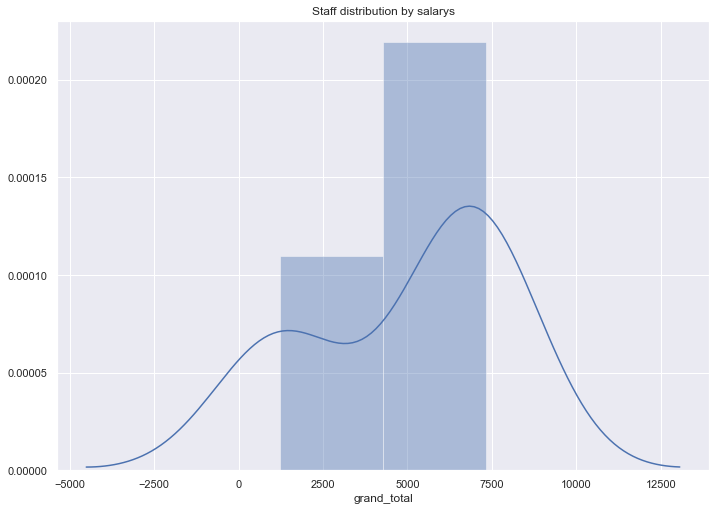

In [14]:
ax = sns.distplot(df_grouped_by_salary['grand_total'])
ax.set_title('Staff distribution by salarys')

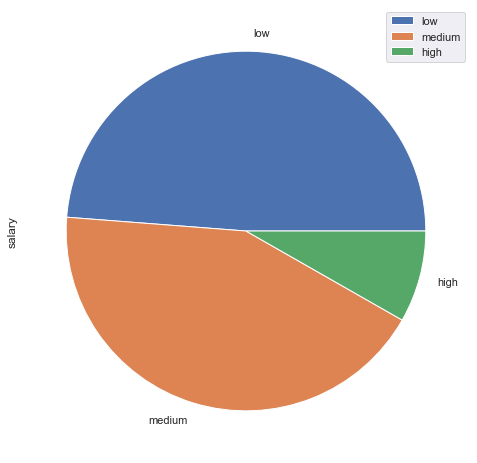

In [15]:
data = df.salary.value_counts()
ax = data.plot(kind='pie')
ax.legend()

In [6]:
# Задание 6. Распределение сотрудников по зарплатам в каждом департаменте
# Сводная таблица для справки
data = df.loc[:, ['department', 'salary', 'satisfaction_level']]
df_pivot = data.pivot_table(index = 'salary', columns = 'department', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
df_pivot.head(15)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


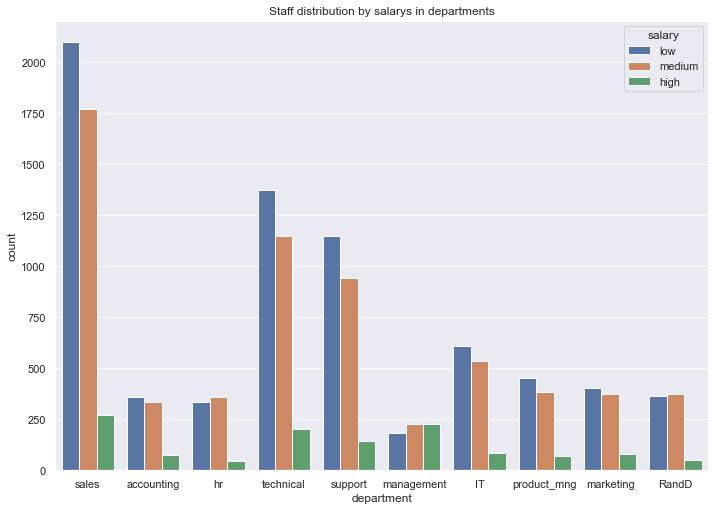

In [16]:
# Задание 6. Распределение сотрудников по зарплатам в каждом департаменте

ax = sns.countplot(x="department", data=df, hue='salary')
ax.set_title('Staff distribution by salarys in departments')
sns.set(rc={'figure.figsize':(11.7,8.27)})

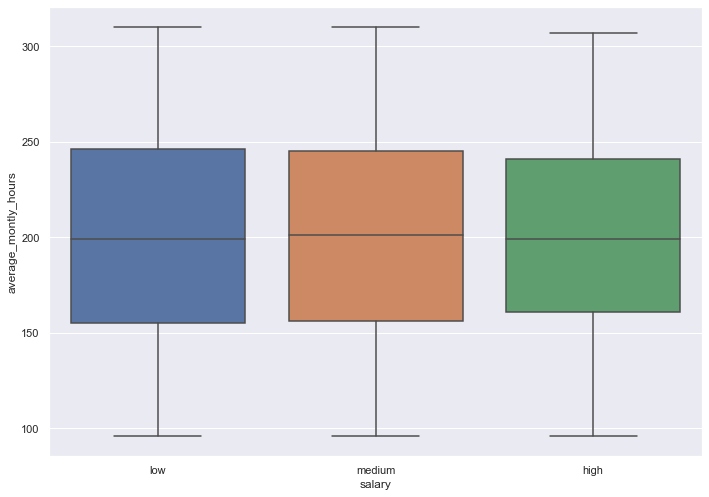

In [17]:
# Задание 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
"""
Визуализируем распределение рабочего времени, проведенного каждым из сотрудников на рабочем месте, по
категориям получаемых ими окладов. Видим, что коробка каждой категории оклада, как и усы и медиана 
мало отличаюся друг от друга. Это подтверждают и основные статистики average_montly_hours для каждой 
категории salary. Таким образом наша гипотеза не подтвердилась.
"""
salary_category = df.salary.value_counts().sort_values(ascending = False).head(3).index.values
salary_category
sns.boxplot(x="salary", y="average_montly_hours", 
            data=df[df.salary.isin(salary_category)])


In [18]:
# Рассчитаем основные статистики average_montly_hours для каждой категории salary
df_sample = df.loc[:, ['average_montly_hours','salary']].groupby('salary')
df_sample.describe()

average_montly_hours                                                    \
                      count        mean        std   min    25%    50%    75%   
salary                                                                          
high                 1237.0  199.867421  47.710446  96.0  161.0  199.0  241.0   
low                  7316.0  200.996583  50.832214  96.0  155.0  199.0  246.0   
medium               6446.0  201.338349  49.344188  96.0  156.0  201.0  245.0   

               
          max  
salary         
high    307.0  
low     310.0  
medium  310.0

In [19]:
# Задание 8. Рассчитаем показатели среди уволившихся и не увольвшихся сотрудников
# Рассчитаем среднюю степень удовлетворенности, среднее количество проектов

results = df.groupby('left').agg({'satisfaction_level': ['mean'], 'number_project': 'mean', 'left': 'count'})
results.head()

,satisfaction_level,number_project,left
,mean,mean,count
left,,,
0,0.666810,3.786664,11428
1,0.440098,3.855503,3571


In [20]:
# Задание 8. Рассчитаем долю сотрудников с повышением за последние 5 лет среди уволившихся сотрудников

left = df[['left', 'promotion_last_5years']][df['left'] == 1]
left_promo = left.promotion_last_5years.value_counts(normalize=True)
left_promo = pd.concat([left_promo], axis=1)
left_promo.head()

,promotion_last_5years
0,0.994679
1,0.005321


In [21]:
# Задание 8. Рассчитаем долю сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников

left = df[['left', 'promotion_last_5years']][df['left'] == 0]
left_promo = left.promotion_last_5years.value_counts(normalize=True)
left_promo = pd.concat([left_promo], axis=1)
left_promo.head()

,promotion_last_5years
0,0.973749
1,0.026251


In [22]:
# Задание 9. Построим модель LDA

# загружаем данные в датафрейм
data = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
data_left = data.left

In [23]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_left, test_size=0.25)

In [24]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda = LinearDiscriminantAnalysis()

In [26]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, lda.predict(X_test)]).T
result.head(25)

,0,1
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [29]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, lda.predict(X_test))

0.7498666666666667

In [31]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.55158588e+00,  6.57442506e-01, -2.32079467e-01,
         4.39967755e-03,  2.41548839e-01, -1.07834388e+00,
         0.00000000e+00, -1.09825257e+00]])